## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
x = np.linspace(1, 20, 50)
x

array([ 1.        ,  1.3877551 ,  1.7755102 ,  2.16326531,  2.55102041,
        2.93877551,  3.32653061,  3.71428571,  4.10204082,  4.48979592,
        4.87755102,  5.26530612,  5.65306122,  6.04081633,  6.42857143,
        6.81632653,  7.20408163,  7.59183673,  7.97959184,  8.36734694,
        8.75510204,  9.14285714,  9.53061224,  9.91836735, 10.30612245,
       10.69387755, 11.08163265, 11.46938776, 11.85714286, 12.24489796,
       12.63265306, 13.02040816, 13.40816327, 13.79591837, 14.18367347,
       14.57142857, 14.95918367, 15.34693878, 15.73469388, 16.12244898,
       16.51020408, 16.89795918, 17.28571429, 17.67346939, 18.06122449,
       18.44897959, 18.83673469, 19.2244898 , 19.6122449 , 20.        ])

In [4]:
y = -1 * x + 2
y

array([  1.        ,   0.6122449 ,   0.2244898 ,  -0.16326531,
        -0.55102041,  -0.93877551,  -1.32653061,  -1.71428571,
        -2.10204082,  -2.48979592,  -2.87755102,  -3.26530612,
        -3.65306122,  -4.04081633,  -4.42857143,  -4.81632653,
        -5.20408163,  -5.59183673,  -5.97959184,  -6.36734694,
        -6.75510204,  -7.14285714,  -7.53061224,  -7.91836735,
        -8.30612245,  -8.69387755,  -9.08163265,  -9.46938776,
        -9.85714286, -10.24489796, -10.63265306, -11.02040816,
       -11.40816327, -11.79591837, -12.18367347, -12.57142857,
       -12.95918367, -13.34693878, -13.73469388, -14.12244898,
       -14.51020408, -14.89795918, -15.28571429, -15.67346939,
       -16.06122449, -16.44897959, -16.83673469, -17.2244898 ,
       -17.6122449 , -18.        ])

#### Plot your data points. 

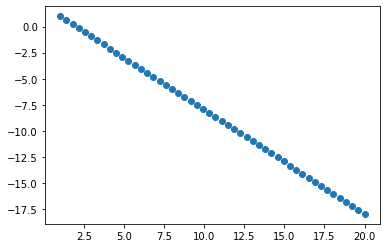

In [5]:
plt.scatter(x,y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [6]:
def fit (X,Y,L,N):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    theta1 = 0
    n = len(X) ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
     
    for i in range(N):
        Y_pred = theta0 + theta1*X
        cost = (1/2*n)*np.sum((Y-Y_pred)**2)
        lossFunc.append(cost)
        hypothesis.append(Y_pred)
        Theta_0.append(theta0)
        Theta_1.append(theta1)
        D_theta0 = (-1/n) * np.sum(Y - Y_pred) # dervative wrt theta0
        D_theta1 = (-1/n) * np.sum(X * (Y - Y_pred)) # dervative wrt theta1
        theta0 = theta0 - L * D_theta0 # update theta0
        theta1 = theta1 - L * D_theta1 # update theta1
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1


In [7]:
Theta_0, Theta_1, loss, hypothesis, y_pred, theta0, theta1 = fit(x,y,0.01,10000)

In [9]:
r2_score(y,y_pred)

1.0

In [12]:
print(theta0,theta1)

1.999999999436814 -0.9999999999581619


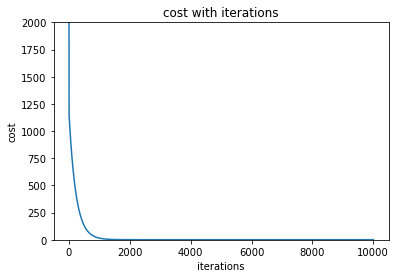

In [25]:
plt.plot(loss)
plt.ylim(-1,2000)
plt.title('cost with iterations')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

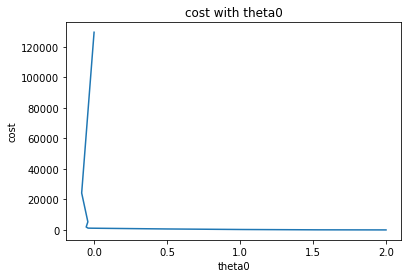

In [26]:
plt.plot(Theta_0, loss)
#plt.ylim(-1,2000)
plt.title('cost with theta0')
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show()

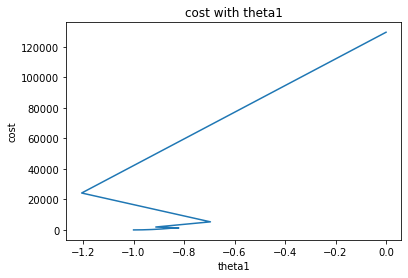

In [27]:
plt.plot(Theta_1, loss)
#plt.ylim(-1,2000)
plt.title('cost with theta1')
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show()

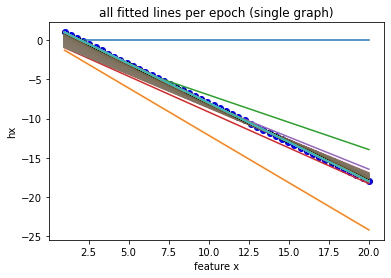

In [28]:
hypothesis = np.array(hypothesis)
hypothesis
plt.plot(x,hypothesis.T)
plt.scatter(x,y, color = 'blue')
plt.title('all fitted lines per epoch (single graph)')
plt.xlabel('feature x')
plt.ylabel('hx')
plt.show()

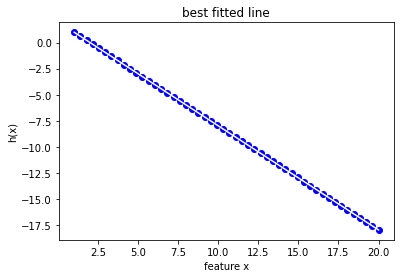

In [29]:
plt.scatter(x,y, color = 'blue')
plt.plot(x,y_pred, color = 'white')
plt.title('best fitted line')
plt.xlabel('feature x')
plt.ylabel('h(x)')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

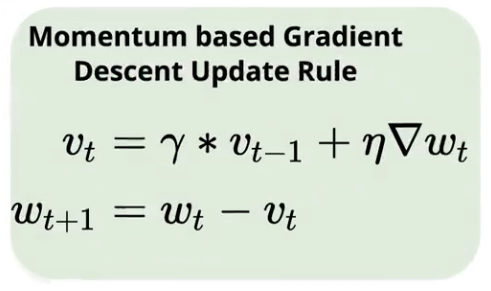

#### γ takes values between 0 and 1.
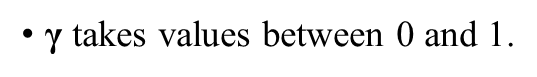

In [58]:
def momentum_GD (X,Y,L,gamma,N):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    vt0 = 0
    theta1 = 0
    vt1 = 1
    n = len(X) ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
     
    for i in range(N):
        Y_pred = theta0 + theta1*X
        cost = (1/2*n)*np.sum((Y-Y_pred)**2)
        lossFunc.append(cost)
        hypothesis.append(Y_pred)
        Theta_0.append(theta0)
        Theta_1.append(theta1)
        D_theta0 = (-1/n) * np.sum(Y - Y_pred) # dervative wrt theta0
        D_theta1 = (-1/n) * np.sum(X * (Y - Y_pred)) # dervative wrt theta1
        vt0 = gamma*vt0 + L * D_theta0
        theta0 = theta0 - vt0 # update theta0
        vt1 = gamma*vt1 + L * D_theta1
        theta1 = theta1 - vt1 # update theta1
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1


In [32]:
MTheta_0, MTheta_1, Mloss, Mhypothesis, yM_pred, Mtheta0, Mtheta1 = momentum_GD(x,y,0.01,0.9,10000)

In [33]:
r2_score(y,yM_pred)

1.0

In [34]:
print(Mtheta0,Mtheta1)

1.9999999999999971 -0.9999999999999998


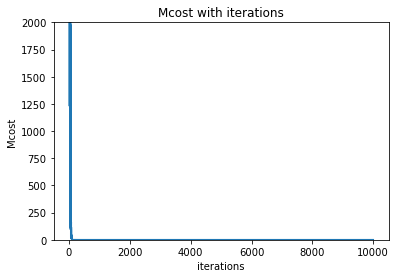

In [35]:
plt.plot(Mloss)
plt.ylim(-1,2000)
plt.title('Mcost with iterations')
plt.xlabel('iterations')
plt.ylabel('Mcost')
plt.show()

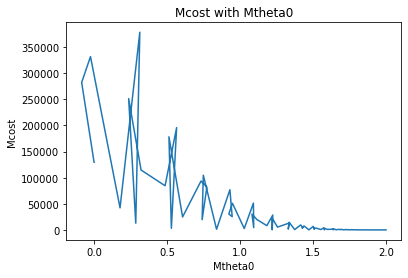

In [36]:
plt.plot(MTheta_0, Mloss)
#plt.ylim(-1,2000)
plt.title('Mcost with Mtheta0')
plt.xlabel('Mtheta0')
plt.ylabel('Mcost')
plt.show()

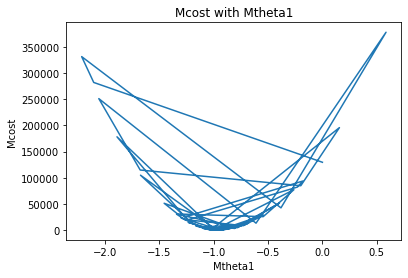

In [37]:
plt.plot(MTheta_1, Mloss)
#plt.ylim(-1,2000)
plt.title('Mcost with Mtheta1')
plt.xlabel('Mtheta1')
plt.ylabel('Mcost')
plt.show()

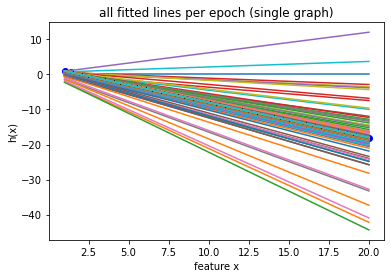

In [38]:
Mhypothesis = np.array(Mhypothesis)
plt.plot(x,Mhypothesis.T)
plt.scatter(x,y, color = 'blue')
plt.title('all fitted lines per epoch (single graph)')
plt.xlabel('feature x')
plt.ylabel('h(x)')
plt.show()

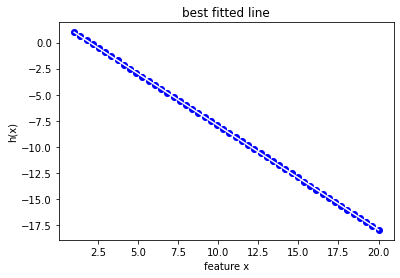

In [39]:
plt.scatter(x,y, color = 'blue')
plt.plot(x,yM_pred, color = 'white')
plt.title('best fitted line')
plt.xlabel('feature x')
plt.ylabel('h(x)')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [47]:
M1Theta_0, M1Theta_1, M1loss, M1hypothesis, yM1_pred, M1theta0, M1theta1 = momentum_GD(x,y,0.01,0.45,10000)
print(r2_score(y,yM1_pred))
print(M1theta0, Mtheta1)

1.0
1.9999999999999722 -0.9999999999999998


In [48]:
M1Theta_0, M1Theta_1, M1loss, M1hypothesis, yM1_pred, M1theta0, M1theta1 = momentum_GD(x,y,0.01,0.999,10000)
print(r2_score(y,yM1_pred))
print(M1theta0, Mtheta1)

0.9998434184989353
1.9971458327603646 -0.9999999999999998


In [49]:
M1Theta_0, M1Theta_1, M1loss, M1hypothesis, yM1_pred, M1theta0, M1theta1 = momentum_GD(x,y,0.01,0.045,10000)
print(r2_score(y,yM1_pred))
print(M1theta0, Mtheta1)

1.0
1.999999999801527 -0.9999999999999998


In [50]:
M1Theta_0, M1Theta_1, M1loss, M1hypothesis, yM1_pred, M1theta0, M1theta1 = momentum_GD(x,y,0.01,0.0,10000)
print(r2_score(y,yM1_pred))
print(M1theta0, Mtheta1)

1.0
1.999999999436814 -0.9999999999999998


### Update your Batch GD for one variable  implementation to be NAG and check your results

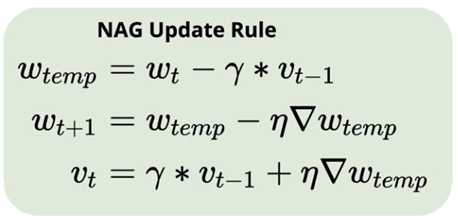

In [56]:
def NAG_GD (X,Y,L,gamma,N):     ## L: learning rate, N: max. #iterations
    theta0 = 0
    vt0 = 0
    theta0_temp = 0
    theta1 = 0
    vt1 = 1
    theta1_temp = 0
    n = len(X) ## n: no. of rows/observations
    lossFunc = []
    Theta_0 = []
    Theta_1 = []
    hypothesis = []
     
    for i in range(N):
        Y_pred = theta0 + theta1*X
        
        cost = (1/2*n)*np.sum((Y-Y_pred)**2)
        lossFunc.append(cost)
        hypothesis.append(Y_pred)
        Theta_0.append(theta0)
        Theta_1.append(theta1)
        
        D_theta0 = (-1/n) * np.sum(Y - Y_pred) # dervative wrt theta0
        D_theta1 = (-1/n) * np.sum(X * (Y - Y_pred)) # dervative wrt theta1
        
        theta0 = theta0 - gamma * vt0
        theta0 = theta0 - L * D_theta0# update theta0
        vt0 = gamma*vt0 + L * D_theta0
        
        theta1 = theta1 - gamma * vt1
        theta1 = theta1 - L * D_theta1 # update theta1
        vt1 = gamma*vt1 + L * D_theta1
        
        
    Y_pred = theta0 + theta1*X
   
    lossFunc = np.array(lossFunc)
    return Theta_0, Theta_1, lossFunc, hypothesis, Y_pred, theta0, theta1


In [59]:
NTheta_0, NTheta_1, Nloss, Nhypothesis, yN_pred, Ntheta0, Ntheta1 = NAG_GD(x,y,0.01,0.45,10000)
print(r2_score(y,yN_pred))
print(N1theta0, Ntheta1)

1.0
1.999999999999948 -0.9999999999999961


In [60]:
NTheta_0, NTheta_1, Nloss, Nhypothesis, yN_pred, Ntheta0, Ntheta1 = NAG_GD(x,y,0.01,0.9,10000)
print(r2_score(y,yN_pred))
print(N1theta0, Ntheta1)

1.0
1.999999999999948 -0.9999999999999997


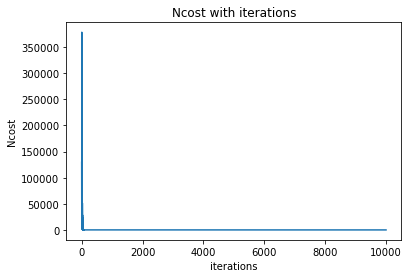

In [62]:
plt.plot(Nloss)
#plt.ylim(-1,2000)
plt.title('Ncost with iterations')
plt.xlabel('iterations')
plt.ylabel('Ncost')
plt.show()

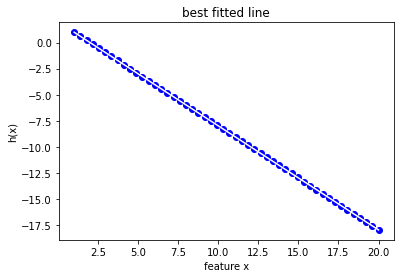

In [63]:
plt.scatter(x,y, color = 'blue')
plt.plot(x,yN_pred, color = 'white')
plt.title('best fitted line')
plt.xlabel('feature x')
plt.ylabel('h(x)')
plt.show()

## Congratulations 
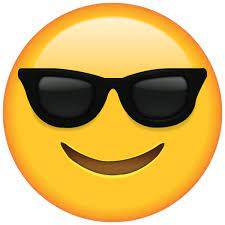